<a href="https://colab.research.google.com/github/msivakumar47/SIVAKUMAR-M/blob/main/k_means_project20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Running KMeans for k=2
Silhouette Score: 0.5326


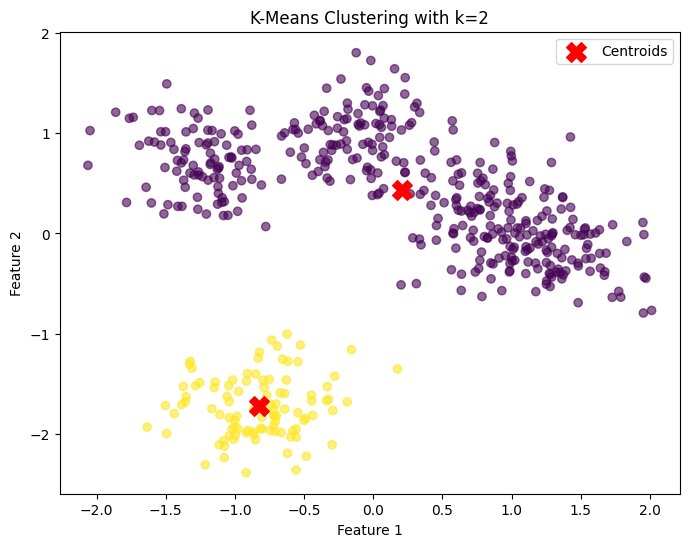

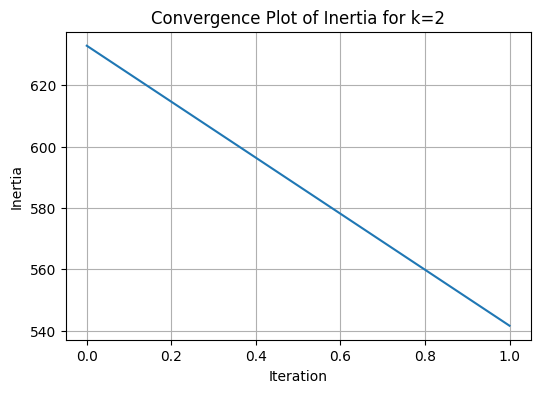


Running KMeans for k=3
Silhouette Score: 0.6207


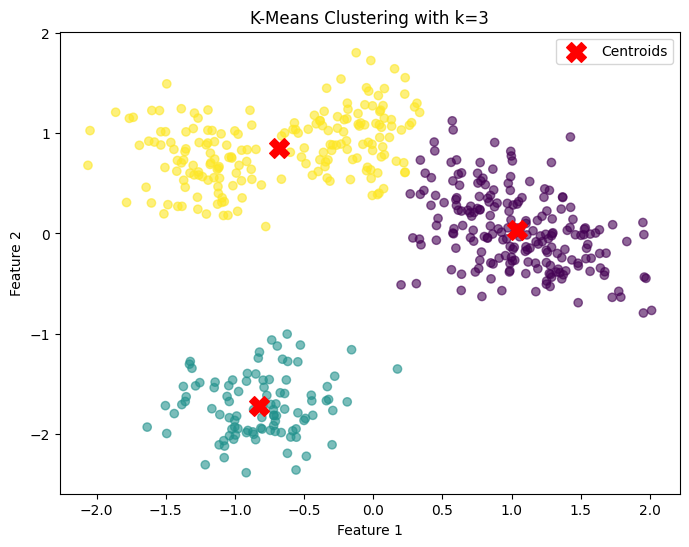

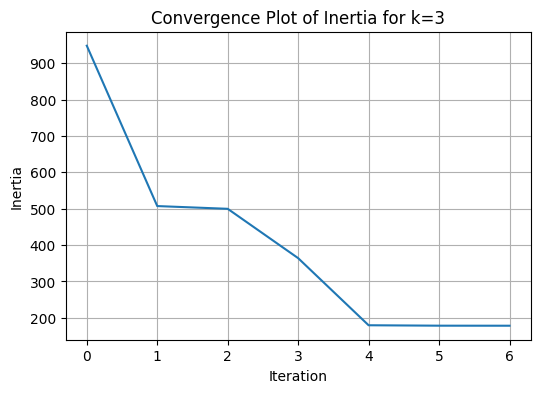


Running KMeans for k=4
Silhouette Score: 0.5952


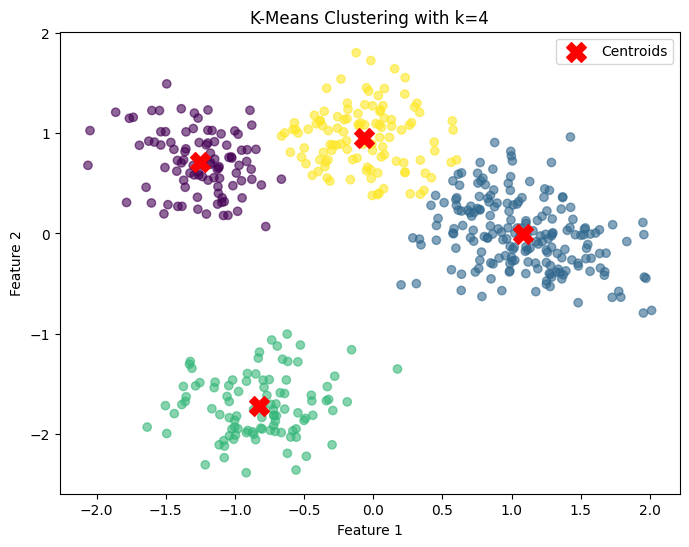

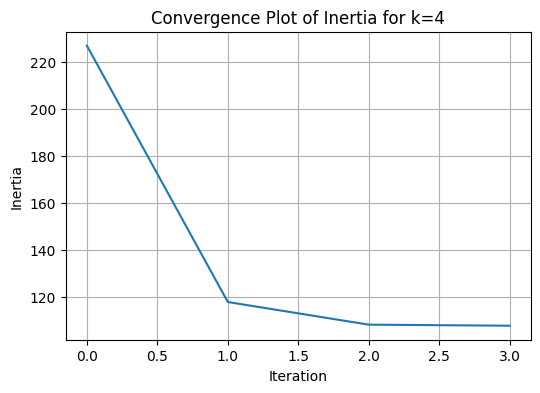


Running KMeans for k=5
Silhouette Score: 0.5206


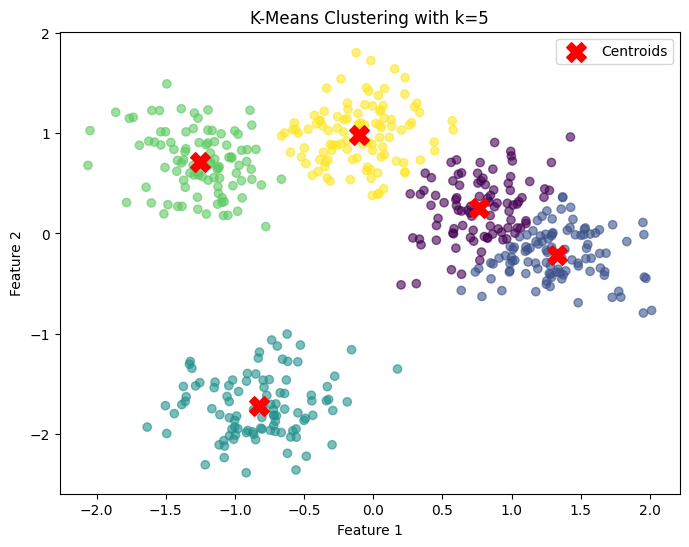

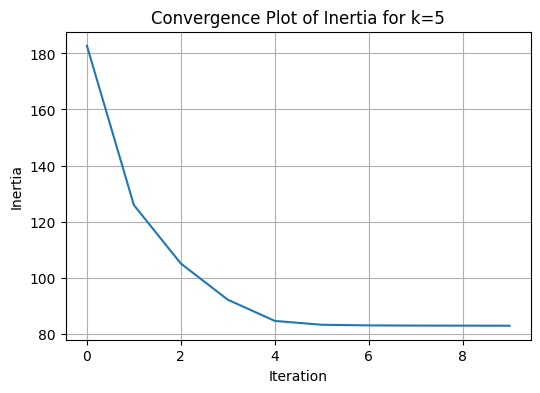


Running KMeans for k=6
Silhouette Score: 0.4949


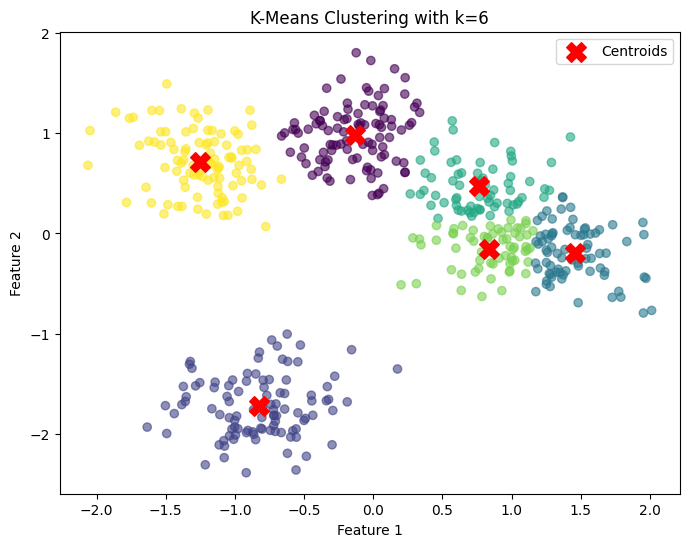

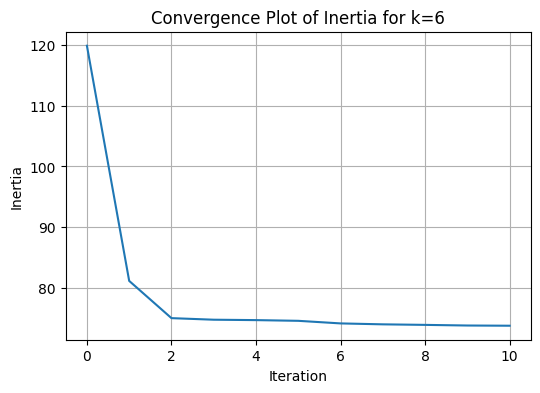


Running KMeans for k=7
Silhouette Score: 0.4136


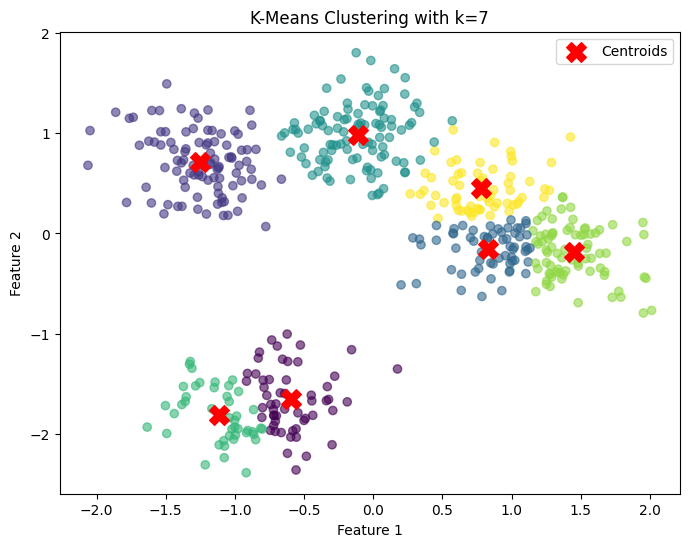

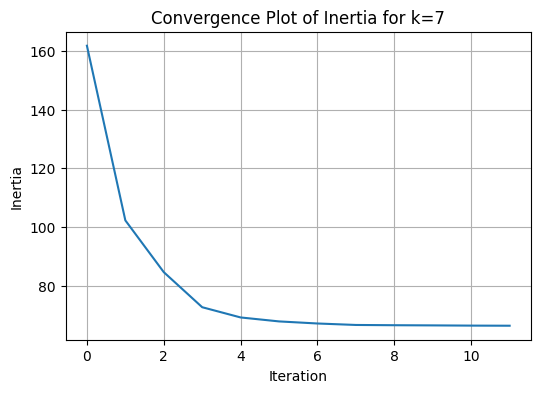


Running KMeans for k=8
Silhouette Score: 0.3723


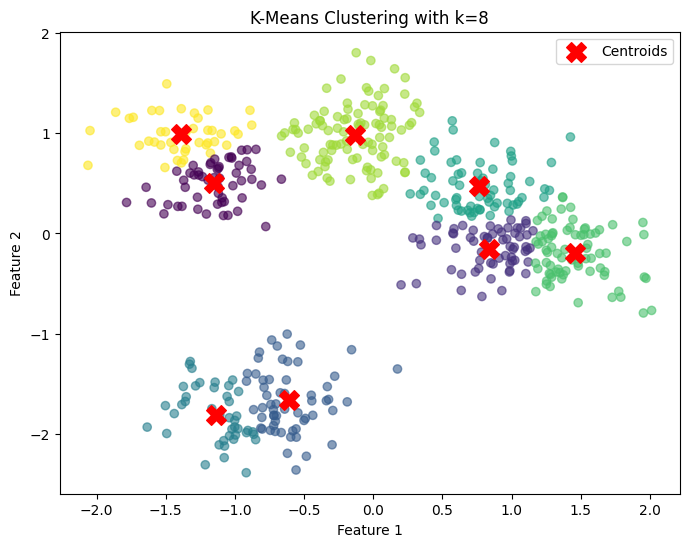

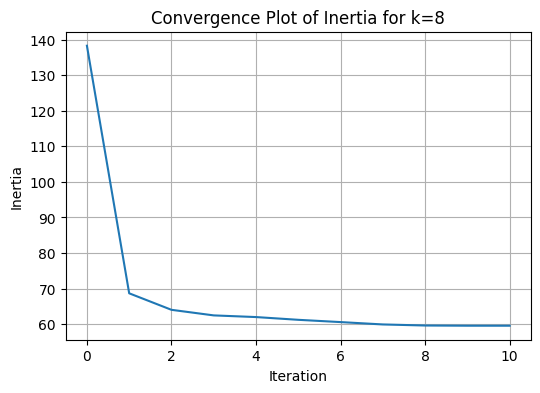


Running KMeans for k=9
Silhouette Score: 0.3504


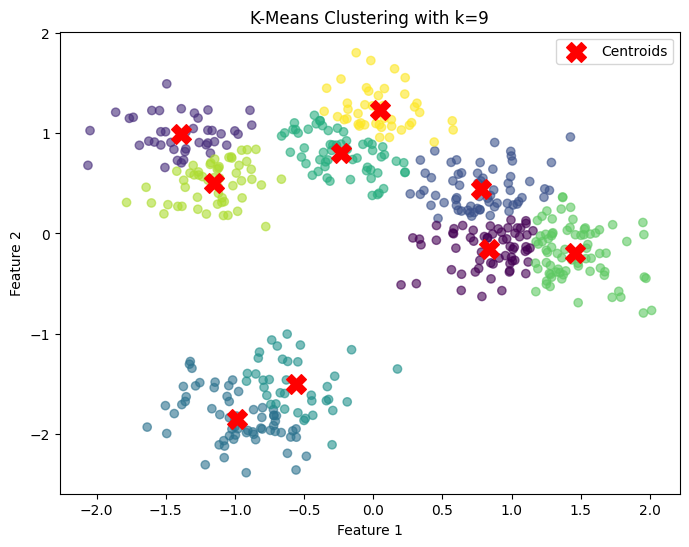

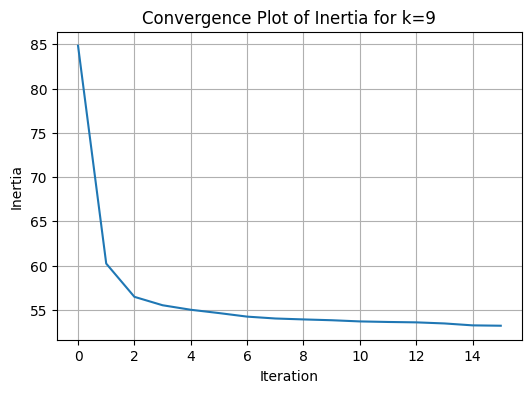


Running KMeans for k=10
Silhouette Score: 0.3606


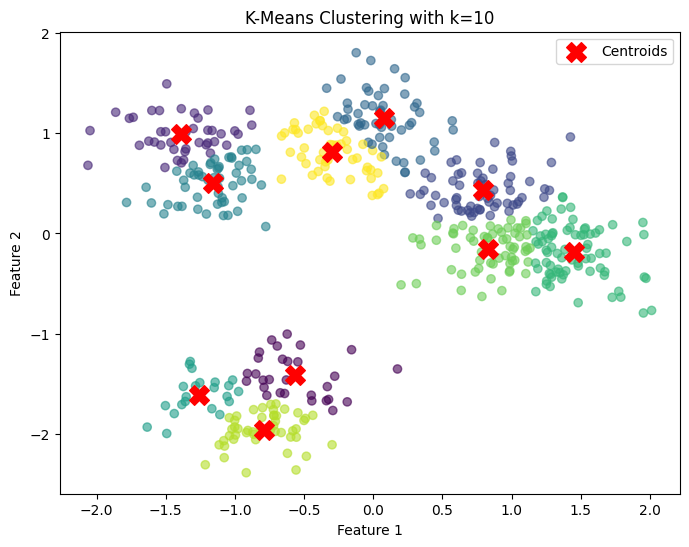

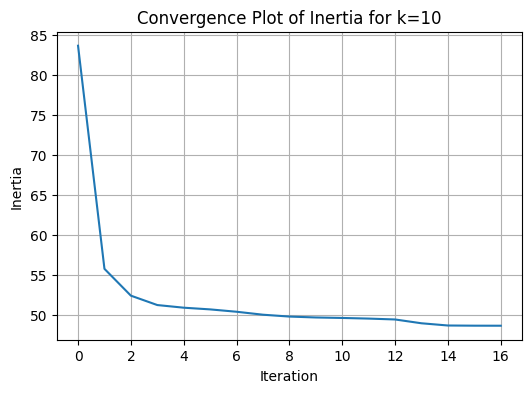

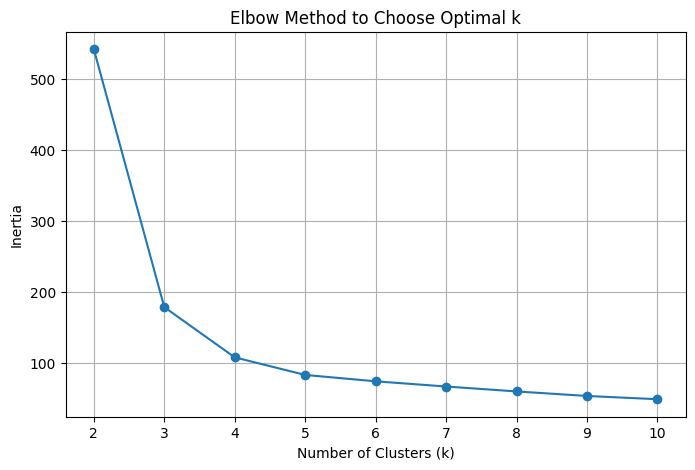

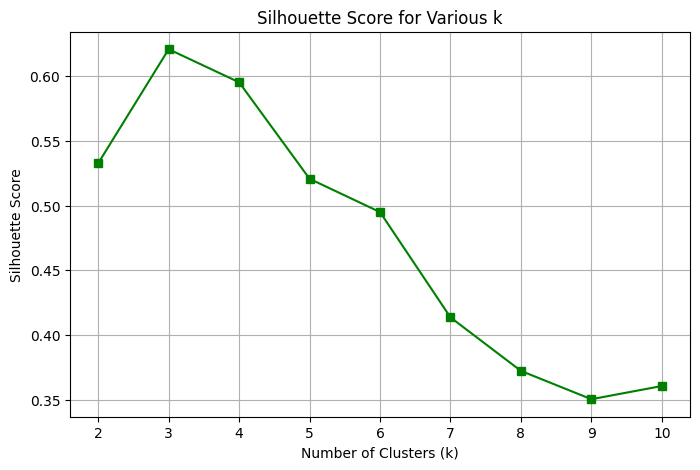

Optimal number of clusters based on silhouette score: 3
Silhouette Scores for tested k values: [np.float64(0.5326407361708615), np.float64(0.6206958843443456), np.float64(0.5951620507373189), np.float64(0.520616388837475), np.float64(0.49490238673597675), np.float64(0.41357592689396505), np.float64(0.3722642528199932), np.float64(0.3503877094811496), np.float64(0.36059244007920777)]
Inertias (Sum of squared distances) for tested k values: [np.float64(541.6022386674423), np.float64(178.30608205012066), np.float64(107.58896494229597), np.float64(82.81394784879261), np.float64(73.8371573585441), np.float64(66.52394674232202), np.float64(59.58152766559011), np.float64(53.2091747113282), np.float64(48.623321174850915)]

Analysis:
- The silhouette score peaks at k=3, indicating the best cluster separation and compactness.
- Elbow method inertia plot can further confirm this choice by showing the point where inertia reduction slows down.
- Small values of k result in larger clusters with less

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

class KMeansOptimized:
    def __init__(self, k, max_iter=300, n_init=20, tol=1e-5):
        """
        Initialize the KMeans model.

        Parameters:
        - k: Number of clusters
        - max_iter: Maximum iterations per initialization
        - n_init: Number of random initializations to perform to select best
        - tol: Tolerance for centroid convergence
        """
        self.k = k
        self.max_iter = max_iter
        self.n_init = n_init
        self.tol = tol
        self.centroids = None

    def _kmeans_plus_plus_init(self, X):
        """
        Initialize centroids using k-means++ method for better starting points.
        """
        n_samples = X.shape[0]
        centroids = np.empty((self.k, X.shape[1]), dtype=X.dtype)
        centroids[0] = X[np.random.randint(n_samples)]
        for i in range(1, self.k):
            dist_sq = np.min(np.sum((X[:, None, :] - centroids[:i]) ** 2, axis=2), axis=1)
            probs = dist_sq / dist_sq.sum()
            cumulative_probs = np.cumsum(probs)
            r = np.random.rand()
            index = np.searchsorted(cumulative_probs, r)
            centroids[i] = X[index]
        return centroids

    def fit(self, X):
        """
        Fit the KMeans model on data X.

        Returns:
        - best_labels: Cluster labels for DATA points
        - best_centroids: Coordinates of cluster centroids
        - best_inertia: Sum of squared distances of samples to their closest cluster center
        """
        best_inertia = np.inf
        best_centroids = None
        best_labels = None

        for init_no in range(self.n_init):
            centroids = self._kmeans_plus_plus_init(X)
            inertia_history = []

            for iteration in range(self.max_iter):
                distances = np.linalg.norm(X[:, None] - centroids, axis=2)
                labels = np.argmin(distances, axis=1)
                new_centroids = np.array([
                    X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i]
                    for i in range(self.k)
                ])

                inertia = np.sum((np.linalg.norm(X - centroids[labels], axis=1)) ** 2)
                inertia_history.append(inertia)

                # Check for convergence: centroids do not change more than tolerance
                if np.allclose(centroids, new_centroids, atol=self.tol):
                    break

                centroids = new_centroids

            if inertia < best_inertia:
                best_inertia = inertia
                best_centroids = centroids.copy()
                best_labels = labels.copy()
                best_inertia_history = inertia_history.copy()

        self.centroids = best_centroids
        self.inertia_history = best_inertia_history
        return best_labels, self.centroids, best_inertia

def visualize_clusters(X, labels, centroids, k):
    """
    Visualize clusters and centroids.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K-Means Clustering with k={k}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

def textual_summary(k, silhouette_scores, inertias):
    """
    Print textual summary of clustering results and analysis.
    """
    optimal_k = k[np.argmax(silhouette_scores)]
    print(f"Optimal number of clusters based on silhouette score: {optimal_k}")
    print(f"Silhouette Scores for tested k values: {silhouette_scores}")
    print(f"Inertias (Sum of squared distances) for tested k values: {inertias}")
    print("\nAnalysis:")
    print(f"- The silhouette score peaks at k={optimal_k}, indicating the best cluster separation and compactness.")
    print("- Elbow method inertia plot can further confirm this choice by showing the point where inertia reduction slows down.")
    print("- Small values of k result in larger clusters with less intra-cluster similarity; high k risks overfitting tiny clusters.")
    print("- The k-means++ initialization ensures better starting centroids, improving convergence speed and clustering quality.")
    print("- Overall, this demonstrates effective cluster structure discovery in the given data.")

if __name__ == "__main__":
    np.random.seed(42)
    # Generate synthetic data with 5 overlapping blobs to meet project requirement
    X, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.8, random_state=42)

    # Standardize data for distance-based clustering
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    silhouette_scores = []
    inertias = []
    k_values = range(2, 11)  # Testing k from 2 to 10

    for k in k_values:
        print(f"\nRunning KMeans for k={k}")
        model = KMeansOptimized(k=k, max_iter=300, n_init=20, tol=1e-5)
        labels, centroids, inertia = model.fit(X_scaled)

        # Calculate silhouette score using sklearn for reliable results
        from sklearn.metrics import silhouette_score
        s_score = silhouette_score(X_scaled, labels)
        silhouette_scores.append(s_score)
        inertias.append(inertia)

        print(f"Silhouette Score: {s_score:.4f}")
        visualize_clusters(X_scaled, labels, centroids, k)

        # Plot convergence of inertia during iterations
        plt.figure(figsize=(6, 4))
        plt.plot(model.inertia_history)
        plt.title(f'Convergence Plot of Inertia for k={k}')
        plt.xlabel('Iteration')
        plt.ylabel('Inertia')
        plt.grid(True)
        plt.show()

    # Plot elbow graph of inertia vs k
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, inertias, marker='o')
    plt.title('Elbow Method to Choose Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

    # Plot silhouette scores vs k
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, silhouette_scores, marker='s', color='green')
    plt.title('Silhouette Score for Various k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

    # Textual summary and analysis
    textual_summary(list(k_values), silhouette_scores, inertias)
